参考视频https://www.bilibili.com/video/BV17p4y1D7yX


# 基础测试模型训练和数据可视化

## 线性可分数据

In [69]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [4, 4]

In [75]:
def plot_svc_decision_function(model, ax=None):
    if ax is None:
        ax = plt.gca()
        # ax.set_size_inches(10, 6)
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # 这段代码就是在坐标轴上采样，最后通过查询模型的决策边界，来得到等高线图，用作后面可视化
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y,X = np.meshgrid(y,x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    ax.contour(X, Y, P, colors="k", levels=[-1,0,1], alpha=0.5, linestyles=["--","-","--"])
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [76]:
X,y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.6)

In [77]:
X,y

(array([[ 1.41281595,  1.5303347 ],
        [ 1.81336135,  1.6311307 ],
        [ 1.43289271,  4.37679234],
        [ 1.87271752,  4.18069237],
        [ 2.09517785,  1.0791468 ],
        [ 2.73890793,  0.15676817],
        [ 3.18515794,  0.08900822],
        [ 2.06156753,  1.96918596],
        [ 2.03835818,  1.15466278],
        [-0.04749204,  5.47425256],
        [ 1.71444449,  5.02521524],
        [ 0.22459286,  4.77028154],
        [ 1.06923853,  4.53068484],
        [ 1.53278923,  0.55035386],
        [ 1.4949318 ,  3.85848832],
        [ 1.1641107 ,  3.79132988],
        [ 0.74387399,  4.12240568],
        [ 2.29667251,  0.48677761],
        [ 0.44359863,  3.11530945],
        [ 0.91433877,  4.55014643],
        [ 1.67467427,  0.68001896],
        [ 2.26908736,  1.32160756],
        [ 1.5108885 ,  0.9288309 ],
        [ 1.65179125,  0.68193176],
        [ 2.49272186,  0.97505341],
        [ 2.33812285,  3.43116792],
        [ 0.67047877,  4.04094275],
        [-0.55552381,  4.695

<function matplotlib.pyplot.show(close=None, block=None)>

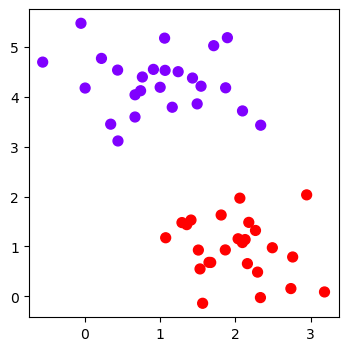

In [78]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')
plt.show

1.0

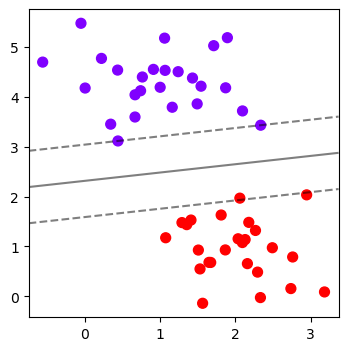

In [79]:
clf = SVC(kernel ='linear').fit(X,y)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='rainbow')
plot_svc_decision_function(clf)
clf.score(X, y)

## 圆形数据

In [80]:
from sklearn.datasets import make_circles
X,y = make_circles(100, factor=0.1, noise=.2)

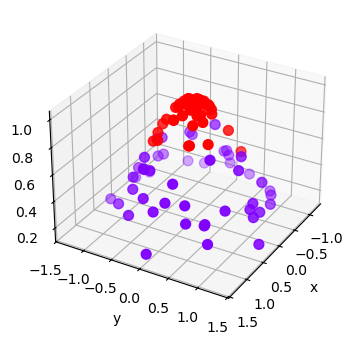

In [81]:
# r 其实是随便取了个东西来提升维度
r = np.exp(-(X**2).sum(1))
rlim = np.linspace(min(r),max(r),100)
from mpl_toolkits import mplot3d

#定义一个绘制三维图像的的数
#eler表示上下旋转的角发中azim表示平行美转的角发
def plot_3D(elev=30,azim=30,X=X,y=y):
    ax = plt.subplot(projection="3d")
    ax.scatter3D(X[:,0],X[:,1],r,c=y,s=50, cmap='rainbow')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("r")
    plt.show()

plot_3D()

In [82]:
from ipywidgets import interact,fixed
interact(plot_3D, elev=(0, 180),azim=(-180, 180), X=fixed(X),y=fixed(y))
plt.show()

interactive(children=(IntSlider(value=30, description='elev', max=180), IntSlider(value=30, description='azim'…

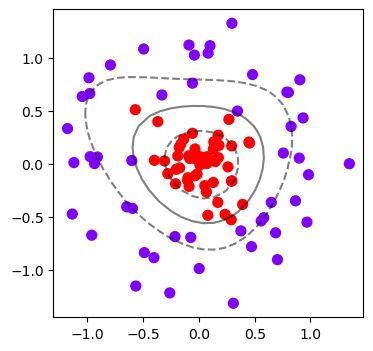

In [83]:
clf = SVC(kernel ='rbf').fit(X,y)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='rainbow')
plot_svc_decision_function(clf)

In [84]:
def plot_svc_decision_function_3D(model, X, y, elev=30,azim=30):
    plt.figure()
    ax = plt.subplot(projection="3d")
    # 这里的Z轴是根据决策边界来的，所以其实得改成rbf核函数的高维空间
    Z = model.decision_function(X)
    ax.scatter3D(X[:, 0], X[:, 1], Z, c=y, s=50, cmap='rainbow', edgecolor='k')
    
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # 这段代码就是在坐标轴上采样，最后通过查询模型的决策边界，来得到等高线图，用作后面可视化
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    x = np.linspace(xlim[0], xlim[1], 50)
    y = np.linspace(ylim[0], ylim[1], 50)
    X_grid, Y_grid = np.meshgrid(x, y)
    xy = np.vstack([X_grid.ravel(), Y_grid.ravel()]).T
    Z_grid = model.decision_function(xy).reshape(X_grid.shape)
    
    ax.contour3D(X_grid, Y_grid, Z_grid, levels=[-1,0,1], alpha=0.5, linestyles=["--","-","--"])
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.set_zlabel("Decision Function")
    plt.show()

In [85]:
clf = SVC(kernel='rbf').fit(X, y)

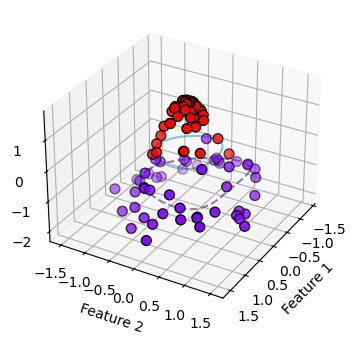

In [86]:
plot_svc_decision_function_3D(clf, X, y)

In [87]:
interact(
    plot_svc_decision_function_3D,
    elev=(0, 90, 10),          # 仰角范围 0~90，步长 10
    azim=(-180, 180, 10),       # 方位角范围 -180~180，步长 10
    model=fixed(clf),           # 固定模型
    X=fixed(X),                 # 固定数据 X
    y=fixed(y)                  # 固定标签 y
)
plt.show()

interactive(children=(IntSlider(value=30, description='elev', max=90, step=10), IntSlider(value=30, descriptio…

In [88]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)#将数据转化为0.1正态分布
X,y

(array([[ 0.6285887 ,  0.91061612],
        [ 0.55869385, -2.4729471 ],
        [-1.77840221, -0.01388625],
        [-0.93990773, -1.58107111],
        [ 1.19748924, -0.69686627],
        [ 1.73342547,  0.78960092],
        [ 0.00877537,  0.10564455],
        [ 0.46807355, -0.07144005],
        [-0.18780309,  2.07311929],
        [-0.27565797,  0.41959164],
        [-0.00368805, -0.03614485],
        [ 0.23004658,  0.3688536 ],
        [ 0.48439627,  0.76443873],
        [-0.32340228,  0.32759985],
        [-1.15054448,  0.03970046],
        [ 1.40086493,  0.17172715],
        [-1.73019904,  0.10277556],
        [-0.77013652,  0.04330223],
        [-0.51137682, -2.28986229],
        [-1.13946738, -0.80267293],
        [-1.51098649,  1.72153125],
        [-0.21056264, -0.30968092],
        [ 0.1151226 , -0.011795  ],
        [ 0.42010311, -0.90741451],
        [-0.09653626,  1.89616517],
        [-0.37621666,  0.1222094 ],
        [ 1.07144141, -0.96695091],
        [-0.34522759, -0.089

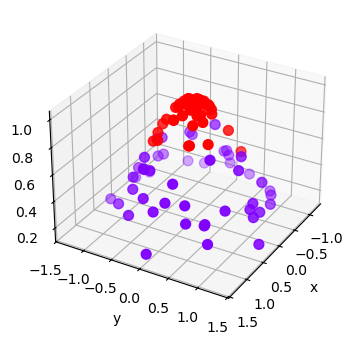

In [89]:
plot_3D()

0.98

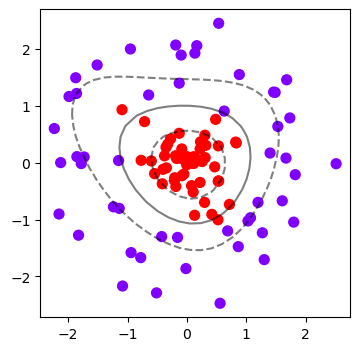

In [90]:
clf = SVC(kernel ='rbf').fit(X,y)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='rainbow')
plot_svc_decision_function(clf)
clf.score(X, y)

## 环形数据

In [136]:
import numpy as np
from sklearn.utils import check_random_state

def make_rings(
    n_samples_inner: int = 100,
    n_samples_outer: int = 100,
    n_samples_middle: int = 200,
    r_min: float = 1.0,
    r_max: float = 2.0,
    noise: float = 0.0,
    random_state: int = None
) -> tuple[np.ndarray, np.ndarray]:
    """
    生成同心环形数据集，适用于非线性分类任务（如SVM的RBF核）。

    Parameters
    ----------
    n_samples_inner : int, default=100
        内环区域（r < r_min）的样本数量
    n_samples_outer : int, default=100
        外环区域（r > r_max）的样本数量
    n_samples_middle : int, default=200
        中间环区域（r_min ≤ r ≤ r_max）的样本数量
    r_min : float, default=1.0
        中间环的内半径
    r_max : float, default=2.0
        中间环的外半径
    noise : float, default=0.0
        高斯噪声的标准差，控制数据点的扰动强度
    random_state : int, default=None
        随机种子，保证结果可复现

    Returns
    -------
    X : ndarray of shape (n_samples, 2)
        生成的特征矩阵，每行是二维坐标 (x, y)
    y : ndarray of shape (n_samples,)
        样本标签，0 表示内环/外环，1 表示中间环
    """
    rng = check_random_state(random_state)
    
    # 参数校验
    if r_min >= r_max:
        raise ValueError("r_min 必须小于 r_max")
    
    # 生成均匀分布在环形区域内的点（面积均匀）
    def generate_points(n, r_low, r_high):
        theta = rng.uniform(0, 2 * np.pi, n)  # 角度均匀分布
        r = rng.uniform(r_low, r_high, n)  # 半径平方均匀分布（保证面积均匀）
        # print('r:', r)
        x = r * np.cos(theta)
        y = r * np.sin(theta)
        # print('x:', x)
        # print('y:', y)
        return np.column_stack((x, y))
    # print('generate innder')
    # 生成内环（r < r_min）
    inner = generate_points(n_samples_inner, 0, r_min)
    # print('generate middle')
    # 生成中间环（r_min ≤ r ≤ r_max）
    middle = generate_points(n_samples_middle, r_min, r_max)
    # print('generate outer')
    # 生成外环（r > r_max），外环宽度与中间环一致
    outer_r_max = r_max + (r_max - r_min)  # 外环外半径为 r_max + Δr
    outer = generate_points(n_samples_outer, r_max, outer_r_max)
    
    # # 合并数据并添加标签
    # X = np.vstack([inner, middle, outer])
    # y = np.hstack([
    #     np.zeros(n_samples_inner + n_samples_outer),
    #     np.ones(n_samples_middle)
    # ])
    # 合并数据并添加标签
    X = np.vstack([inner, outer, middle])
    y = np.hstack([
        np.zeros(n_samples_inner + n_samples_outer),
        np.ones(n_samples_middle)
    ])
    # 添加高斯噪声
    if noise > 0:
        X += rng.normal(scale=noise, size=X.shape)
    
    # 打乱数据顺序
    indices = rng.permutation(X.shape[0])
    return X[indices], y[indices]

In [137]:
# X, y

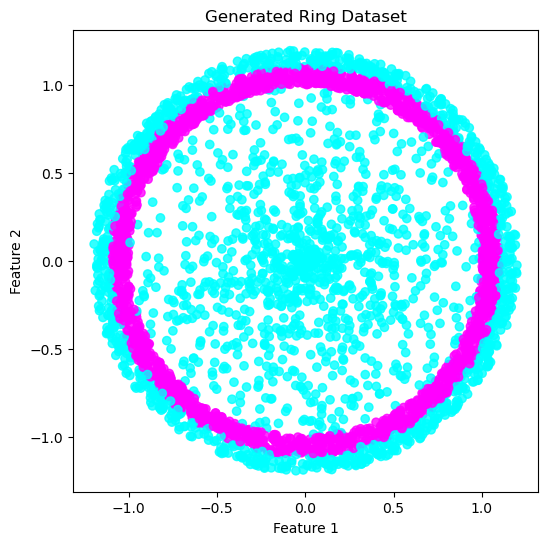

In [138]:
import matplotlib.pyplot as plt

# 生成数据集
X, y = make_rings(
    n_samples_inner=1000,
    n_samples_outer=1000,
    n_samples_middle=2000,
    r_min=1.0,
    r_max=1.1,
    noise=-0.1
)

# 可视化
plt.figure(figsize=(6, 6))
plt.scatter(X[:,0], X[:,1], c=y, cmap='cool', alpha=0.8)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Generated Ring Dataset")
plt.show()

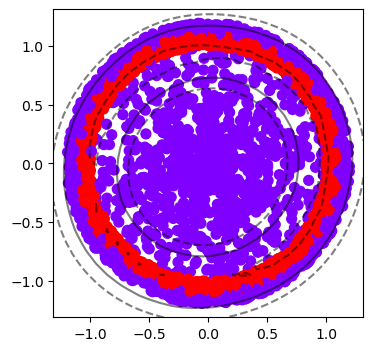

In [139]:
clf = SVC(kernel ='rbf').fit(X,y)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='rainbow')
plot_svc_decision_function(clf)

In [140]:
score = clf.score(X, y)
score

0.70525

## MLP方案

In [141]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from torch.utils.data import DataLoader, TensorDataset

# 设备配置
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 数据预处理（添加验证集划分）
def prepare_data(X, y, test_size=0.2, val_size=0.2, random_state=42):
    # 先划分训练+验证集和测试集
    X_train_val, X_test, y_train_val, y_test = train_test_split(
        X, y, 
        test_size=test_size,
        stratify=y,
        random_state=random_state
    )
    
    # 再从训练集中划分验证集
    X_train, X_val, y_train, y_val = train_test_split(
        X_train_val, y_train_val,
        test_size=val_size/(1-test_size),
        stratify=y_train_val,
        random_state=random_state
    )
    
    # 转换为Tensor
    X_train = torch.FloatTensor(X_train).to(device)
    X_val = torch.FloatTensor(X_val).to(device)
    X_test = torch.FloatTensor(X_test).to(device)
    y_train = torch.LongTensor(y_train).to(device)
    y_val = torch.LongTensor(y_val).to(device)
    y_test = torch.LongTensor(y_test).to(device)
    
    # 创建DataLoader
    train_dataset = TensorDataset(X_train, y_train)
    val_dataset = TensorDataset(X_val, y_val)
    test_dataset = TensorDataset(X_test, y_test)
    
    return train_dataset, val_dataset, test_dataset


# MLP模型定义
class MLP(torch.nn.Module):
    def __init__(self, input_dim=2, hidden_dims=[64, 32], output_dim=2):
        super(MLP, self).__init__()
        layers = []
        prev_dim = input_dim
        for h_dim in hidden_dims:
            layers.append(torch.nn.Linear(prev_dim, h_dim))
            layers.append(torch.nn.ReLU())
            layers.append(torch.nn.BatchNorm1d(h_dim))
            prev_dim = h_dim
        layers.append(torch.nn.Linear(prev_dim, output_dim))
        
        self.net = torch.nn.Sequential(*layers)
    
    def forward(self, x):
        return self.net(x)


# 修改训练函数以记录准确率
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=100):
    model.train()
    train_loss_history = []
    train_acc_history = []
    val_acc_history = []
    
    for epoch in range(num_epochs):
        # 训练阶段
        model.train()
        epoch_loss = 0.0
        correct_train = 0
        total_train = 0
        
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            loss.backward()
            optimizer.step()
            
            # 统计训练指标
            epoch_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()
        
        # 计算训练指标
        avg_loss = epoch_loss / len(train_loader)
        train_acc = 100 * correct_train / total_train
        
        # 验证阶段
        model.eval()
        correct_val = 0
        total_val = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                _, predicted = torch.max(outputs.data, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()
        
        val_acc = 100 * correct_val / total_val
        
        # 记录历史数据
        train_loss_history.append(avg_loss)
        train_acc_history.append(train_acc)
        val_acc_history.append(val_acc)
        
        # 打印进度
        if (epoch+1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}] => '
                  f'Train Loss: {avg_loss:.4f}, '
                  f'Train Acc: {train_acc:.2f}%, '
                  f'Val Acc: {val_acc:.2f}%')
    
    return train_loss_history, train_acc_history, val_acc_history

# 可视化函数
def plot_metrics(train_loss, train_acc, val_acc):
    plt.figure(figsize=(12, 5))
    
    # 绘制损失曲线
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='Training Loss')
    plt.title('Training Loss Curve')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    # 绘制准确率曲线
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Accuracy Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
# 评估函数
def evaluate_model(model, test_loader):
    model.eval()
    y_true = []
    y_pred = []
    
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())
    
    # 计算指标
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)
    
    print(f'Accuracy: {acc:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print('Confusion Matrix:')
    print(cm)
    
    return acc, f1, cm



Start training...
Epoch [10/2000] => Train Loss: 0.2568, Train Acc: 89.62%, Val Acc: 91.88%
Epoch [20/2000] => Train Loss: 0.1926, Train Acc: 93.04%, Val Acc: 94.75%
Epoch [30/2000] => Train Loss: 0.1695, Train Acc: 93.79%, Val Acc: 92.12%
Epoch [40/2000] => Train Loss: 0.1357, Train Acc: 95.29%, Val Acc: 95.25%
Epoch [50/2000] => Train Loss: 0.1531, Train Acc: 94.33%, Val Acc: 95.25%
Epoch [60/2000] => Train Loss: 0.1139, Train Acc: 95.54%, Val Acc: 96.50%
Epoch [70/2000] => Train Loss: 0.1453, Train Acc: 94.12%, Val Acc: 95.50%
Epoch [80/2000] => Train Loss: 0.1275, Train Acc: 94.75%, Val Acc: 96.88%
Epoch [90/2000] => Train Loss: 0.1201, Train Acc: 95.67%, Val Acc: 95.88%
Epoch [100/2000] => Train Loss: 0.1215, Train Acc: 95.71%, Val Acc: 95.50%
Epoch [110/2000] => Train Loss: 0.1123, Train Acc: 96.00%, Val Acc: 96.50%
Epoch [120/2000] => Train Loss: 0.1388, Train Acc: 94.71%, Val Acc: 96.50%
Epoch [130/2000] => Train Loss: 0.1100, Train Acc: 96.21%, Val Acc: 97.00%
Epoch [140/2000]

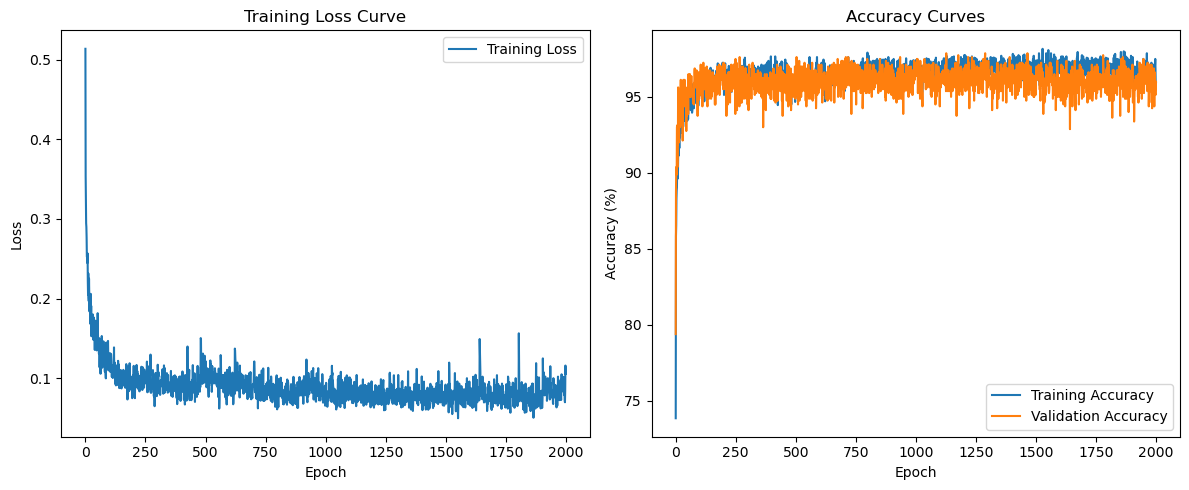


Final Evaluation on Test Set:
Accuracy: 0.9487
F1 Score: 0.9502
Confusion Matrix:
[[368  32]
 [  9 391]]


(0.94875,
 0.9501822600243013,
 array([[368,  32],
        [  9, 391]]))

In [142]:
# 数据预处理（获得训练/验证/测试集）
train_dataset, val_dataset, test_dataset = prepare_data(X, y)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# 初始化模型
model = MLP(input_dim=2, hidden_dims=[128, 64, 32], output_dim=2).to(device)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)

# 训练模型
print("Start training...")
train_loss, train_acc, val_acc = train_model(
    model, train_loader, val_loader, 
    criterion, optimizer, num_epochs=400
)

# 可视化训练过程
plot_metrics(train_loss, train_acc, val_acc)

# 最终测试集评估
print("\nFinal Evaluation on Test Set:")
evaluate_model(model, test_loader)

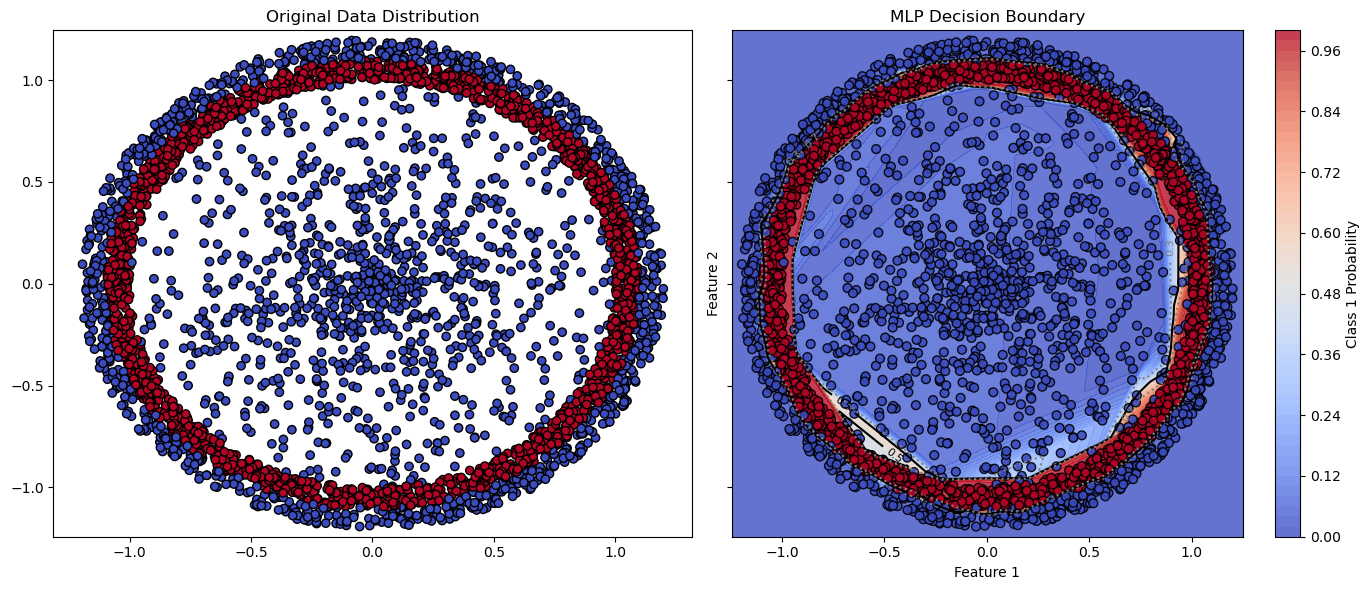

In [143]:
def plot_mlp_decision_boundary(model, X, y, ax=None, cmap='coolwarm', alpha=0.8, contour_levels=50):
    """
    绘制MLP的决策边界可视化（支持二维特征）
    
    参数：
        model : 训练好的PyTorch模型
        X : 原始特征数据 (numpy array)
        y : 标签数据 (numpy array)
        ax : matplotlib的坐标轴对象，默认为当前轴
        cmap : 颜色图谱，默认为'coolwarm'
        alpha : 透明度，默认为0.8
        contour_levels : 等高线精细度，默认为50
    """
    if ax is None:
        ax = plt.gca()
    
    # 设置坐标轴范围（增加5%的边界）
    margin = 0.05
    x_min, x_max = X[:, 0].min() - margin, X[:, 0].max() + margin
    y_min, y_max = X[:, 1].min() - margin, X[:, 1].max() + margin
    
    # 生成网格点（比SVM版本更高分辨率）
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    
    # 转换为PyTorch Tensor并预测
    with torch.no_grad():
        mesh_inputs = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()]).to(device)
        model.eval()
        logits = model(mesh_inputs)
        if logits.shape[1] == 1:  # 二分类sigmoid输出
            Z = torch.sigmoid(logits).cpu().numpy().reshape(xx.shape)
        else:  # 多分类softmax输出
            Z = torch.softmax(logits, dim=1)[:, 1].cpu().numpy().reshape(xx.shape)
    
    # 绘制决策边界
    contour = ax.contourf(xx, yy, Z, cmap=cmap, alpha=alpha, levels=contour_levels)
    
    # # 绘制等高线（比SVM版本更精细）
    # CS = ax.contour(xx, yy, Z, levels=[0.5],  # 主要决策边界
    #                linestyles='--', linewidths=2, colors='k')
    # ax.clabel(CS, inline=True, fmt='Decision Boundary', fontsize=10)
    
    # 在contour调用中添加多个level
    CS = ax.contour(xx, yy, Z, levels=[0.3, 0.5, 0.7],
               linestyles=[':', '-', ':'], 
               colors=['gray', 'k', 'gray'])
    ax.clabel(CS, fmt='%.1f', fontsize=8)
    
    # 绘制原始数据点
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', 
                        cmap=cmap, s=40, alpha=0.9)
    
    # 添加颜色条和标签
    plt.colorbar(contour, ax=ax, label='Class 1 Probability')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title('MLP Decision Boundary Visualization')
    
    return ax

# 使用示例 -------------------------------------------------
def visualize_comparison():
    # 创建对比画布
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
    
    # 绘制原始数据分布
    ax1.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm', edgecolor='k')
    ax1.set_title('Original Data Distribution')
    
    # 绘制MLP决策边界
    plot_mlp_decision_boundary(model, X, y, ax=ax2)
    ax2.set_title('MLP Decision Boundary')
    
    plt.tight_layout()
    plt.show()

# 在训练后调用可视化
visualize_comparison()

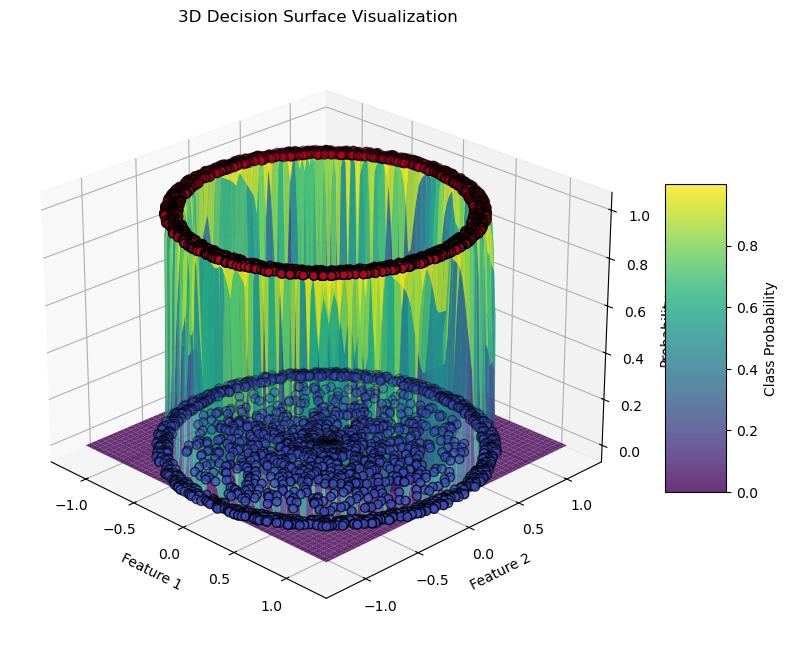

In [144]:
from mpl_toolkits.mplot3d import Axes3D
def plot_3d_surface(model, X, y):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # 生成网格（确保与模型输入维度一致）
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # 转换为模型输入格式
    with torch.no_grad():
        # 将网格展平为 (10000, 2) 的数组
        mesh_points = np.column_stack([xx.ravel(), yy.ravel()])
        mesh_inputs = torch.FloatTensor(mesh_points).to(device)
        
        # 获取模型输出（根据模型结构调整）
        outputs = model(mesh_inputs)
        
        # 处理不同输出类型
        if outputs.shape[1] == 1:  # 单输出神经元（sigmoid）
            Z = outputs.sigmoid().cpu().numpy().reshape(xx.shape)
        else:  # 多分类（取第一个类别的概率）
            Z = torch.softmax(outputs, dim=1)[:, 1].cpu().numpy().reshape(xx.shape)
    
    # 绘制3D曲面
    surf = ax.plot_surface(xx, yy, Z, 
                          cmap='viridis', 
                          alpha=0.8,
                          antialiased=True)
    
    # 叠加原始数据点
    scatter = ax.scatter(X[:,0], X[:,1], y, 
                        c=y, cmap='coolwarm',
                        edgecolor='k', 
                        s=40,
                        depthshade=True)
    
    # 美化图形
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5, label='Class Probability')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Probability')
    ax.set_title('3D Decision Surface Visualization')
    ax.view_init(elev=25, azim=-45)  # 调整观察角度
    
    plt.show()

# 使用示例
plot_3d_surface(model, X, y)